In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [3]:
price1 = pd.read_csv("price1.csv", sep=";")
price2 = pd.read_csv("price2.csv", sep=";")
price3 = pd.read_csv("price3.csv", sep=";")

In [4]:
#MAKE THE INDEX COUNT FROM 0 to n, and then make timestamp the leftmost column                         
price1 = price1.set_index("timestamp")
price2 = price2.set_index("timestamp")
price3 = price3.set_index("timestamp")

In [5]:
price2.index = price2.index + price1.index[-1] + 100
# to every
#  timestamp in price3, add the last timestamp in price2 +100
price3.index = price3.index + price2.index[-1] + 100

In [6]:
combined = pd.concat([price1, price2, price3])
#replaceNaN
combined = combined.fillna(0)

In [7]:
diving = combined[combined["product"] == "DIVING_GEAR"]
dolphins = combined[combined["product"] == "DOLPHIN_SIGHTINGS"]
diving["total_bid_volume"] = diving["bid_volume_1"] + diving["bid_volume_2"] + diving["bid_volume_3"]
diving["total_ask_volume"] = diving["ask_volume_1"] + diving["ask_volume_2"] + diving["ask_volume_3"]
diving["spread"] = diving["ask_price_1"] - diving["bid_price_1"]
#for dolphin sightings, remove everything except timestamp, product, and mid_pirce
dolphins = dolphins[["product", "mid_price"]]

#make timestamp no longer the index, but a column
diving = diving.reset_index()
dolphins = dolphins.reset_index()
diving.head()

C:\Users\jean\AppData\Local\Temp\ipykernel_26700\3752732605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diving["total_bid_volume"] = diving["bid_volume_1"] + diving["bid_volume_2"] + diving["bid_volume_3"]
C:\Users\jean\AppData\Local\Temp\ipykernel_26700\3752732605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diving["total_ask_volume"] = diving["ask_volume_1"] + diving["ask_volume_2"] + diving["ask_volume_3"]
C:\Users\jean\AppData\Local\Temp\ipykernel_26700\3752732605.py:5: SettingWithCopyWar

,timestamp,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,total_bid_volume,total_ask_volume,spread
0,0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,0.0,0.0,100001.0,6.0,100002.0,19.0,0.0,0.0,100000.0,0.000000,25.0,25.0,2.0
1,100,0,DIVING_GEAR,99999.0,5.0,99998.0,12.0,0.0,0.0,100001.0,5.0,100002.0,12.0,0.0,0.0,100000.0,0.000000,17.0,17.0,2.0
2,200,0,DIVING_GEAR,100002.0,2.0,100001.0,10.0,100000.0,14.0,100003.0,10.0,100004.0,14.0,0.0,0.0,100002.5,-2.875000,26.0,24.0,1.0
3,300,0,DIVING_GEAR,99999.0,9.0,99998.0,11.0,0.0,0.0,100001.0,9.0,100002.0,11.0,0.0,0.0,100000.0,-1.140625,20.0,20.0,2.0
4,400,0,DIVING_GEAR,99993.0,19.0,0.0,0.0,0.0,0.0,99996.0,19.0,0.0,0.0,0.0,0.0,99994.5,4.484375,19.0,19.0,3.0


In [8]:

dolphins.head(10)

,timestamp,product,mid_price
0,0,DOLPHIN_SIGHTINGS,3000.0
1,100,DOLPHIN_SIGHTINGS,3000.0
2,200,DOLPHIN_SIGHTINGS,2999.0
3,300,DOLPHIN_SIGHTINGS,2999.0
4,400,DOLPHIN_SIGHTINGS,2999.0
5,500,DOLPHIN_SIGHTINGS,3000.0
6,600,DOLPHIN_SIGHTINGS,3000.0
7,700,DOLPHIN_SIGHTINGS,3000.0
8,800,DOLPHIN_SIGHTINGS,2999.0
9,900,DOLPHIN_SIGHTINGS,3000.0


In [9]:
#make each the 100:200 terms
# diving = diving[100:300]
# dolphins = dolphins[100:300]

Text(0.5, 1.0, 'Spread')

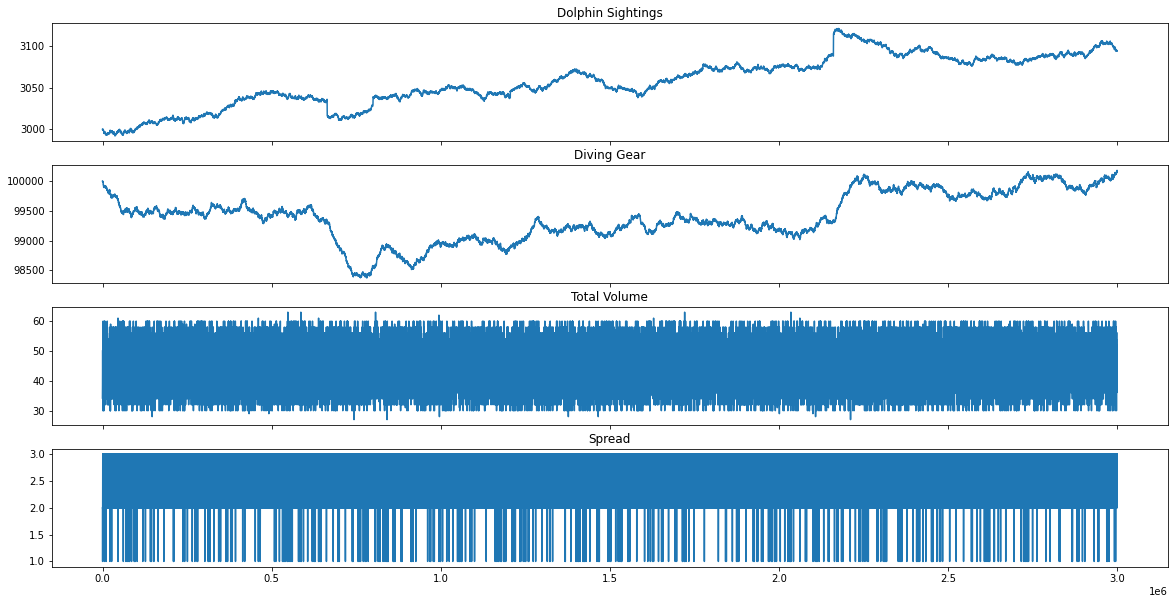

In [10]:
#in vertically stacked plots, show dolphins mid price, diving mid price, diving total volume, and diving spread
fig, ax = plt.subplots(4, 1, sharex=True)
# ax[0].plot(dolphins.index, dolphins["mid_price"])
# ax[0].set_title("Dolphin Sightings")
# ax[1].plot(diving.index, diving["mid_price"])
# ax[1].set_title("Diving Gear")
# ax[2].plot(diving.index, diving["total_bid_volume"] + diving["total_ask_volume"])
# ax[2].set_title("Total Volume")
# ax[3].plot(diving.index, diving["spread"])
# ax[3].set_title("Spread")
ax[0].plot(dolphins["timestamp"], dolphins["mid_price"])
ax[0].set_title("Dolphin Sightings")
ax[1].plot(diving["timestamp"], diving["mid_price"])
ax[1].set_title("Diving Gear")
ax[2].plot(diving["timestamp"], diving["total_bid_volume"] + diving["total_ask_volume"])
ax[2].set_title("Total Volume")
ax[3].plot(diving["timestamp"], diving["spread"])
ax[3].set_title("Spread")





In [19]:
#we are going to find large spikes or drops in the dolphin sightings mid price
#make a column with "Delta"
dolphins["Delta"] = dolphins["mid_price"].diff()
dolphins["DeltaAbs"] = dolphins["Delta"].abs()

In [26]:
dolphinsSorted = dolphins.copy()
#sort by absolute value of delta
dolphinsSorted = dolphinsSorted.sort_values(by="DeltaAbs", ascending=False)

In [27]:
dolphinsSorted.head(20)

,timestamp,product,mid_price,Delta,DeltaAbs
21611,2161100,DOLPHIN_SIGHTINGS,3114.0,26.0,26.0
6641,664100,DOLPHIN_SIGHTINGS,3017.0,-19.0,19.0
7997,799700,DOLPHIN_SIGHTINGS,3039.0,9.0,9.0
12057,1205700,DOLPHIN_SIGHTINGS,3046.0,8.0,8.0
17749,1774900,DOLPHIN_SIGHTINGS,3077.0,5.0,5.0
21349,2134900,DOLPHIN_SIGHTINGS,3085.0,4.0,4.0
24176,2417600,DOLPHIN_SIGHTINGS,3095.0,-4.0,4.0
21143,2114300,DOLPHIN_SIGHTINGS,3076.0,3.0,3.0
3912,391200,DOLPHIN_SIGHTINGS,3034.0,3.0,3.0
11383,1138300,DOLPHIN_SIGHTINGS,3044.0,3.0,3.0


In [24]:
# get only the top 4 rows
dolphinsSorted = dolphinsSorted[0:4]

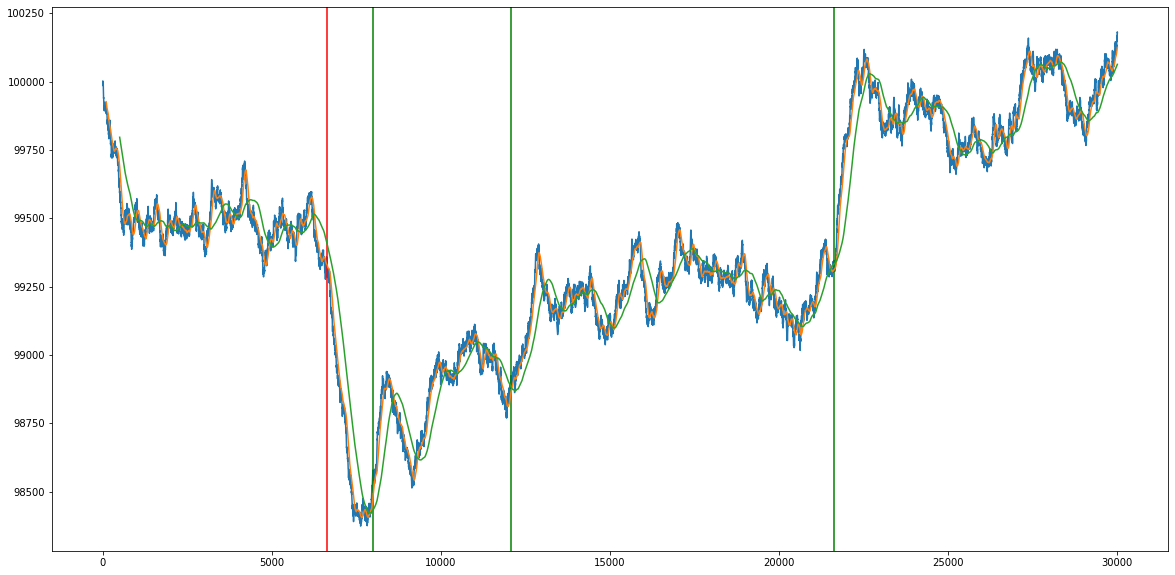

In [25]:
WINDOW1 = 100
WINDOW2 = 500

#MAKE THE INDEX COUNT FROM 0, BUT MAKE THE X AXIS SHOW THE ACTUAL TIMESTAMP


#make a two columns with moving averages of the diving gear mid price
diving["MA1"] = diving["mid_price"].rolling(WINDOW1).mean()
diving["MA2"] = diving["mid_price"].rolling(WINDOW2).mean()
#graph the price of diving gears, with vertical lines at the timestamps of the top 5, red if delta is negative, green if positive
fig, ax = plt.subplots(1, 1)
ax.plot(diving.index, diving["mid_price"])
for index, row in dolphinsSorted.iterrows():
    if row["Delta"] < 0:
        ax.axvline(x=index, color="red")
    else:
        ax.axvline(x=index, color="green")
ax.plot(diving.index, diving["MA1"])
ax.plot(diving.index, diving["MA2"])


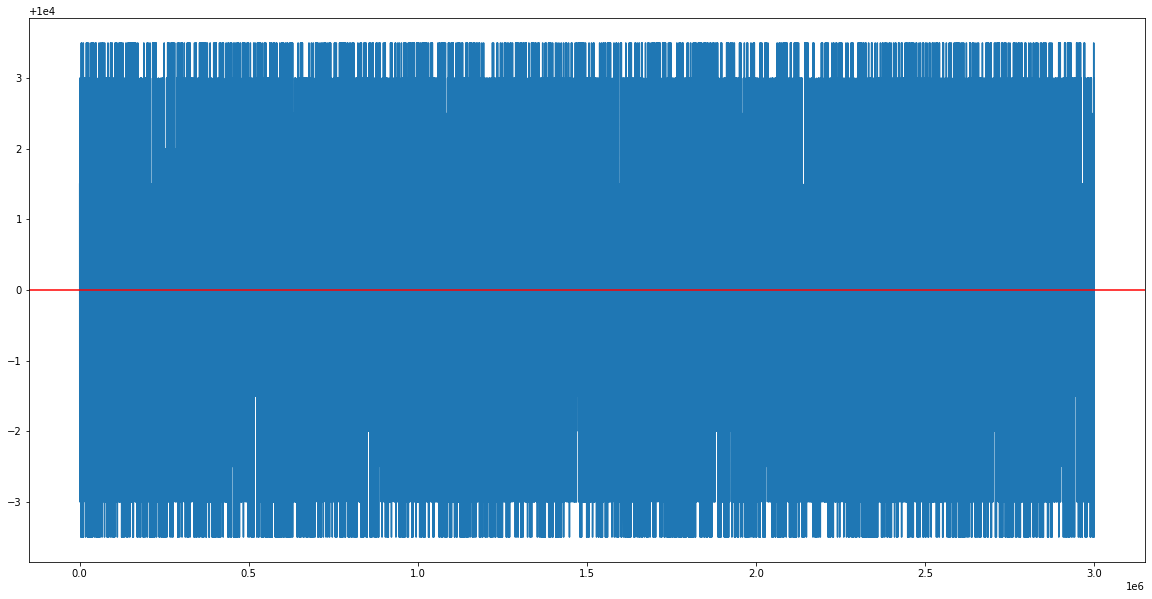

In [16]:
pearls = combined[combined["product"] == "PEARLS"]
#plot the price, and a horizontal line at 10,000
fig, ax = plt.subplots(1, 1)
ax.plot(pearls.index, pearls["mid_price"])
ax.axhline(y=10000, color="red")